# Summary

This notebook is  3rd in series and requires the notebook 1 and 2 to be ran before this.
This focuses on converting non-numerical data in to numerical data
- [import packages and cleaned data (training and test)](#import_cleaned_Data)
- [one hot encoding - ordinal data ](#convert_ord)
- [one hot encoding - nominal data  ](#convert_nom)
- [Section  - Refeneces](#References)

###  Import  cleaned data (training and test) and sanity and missing verification <a id='import_cleaned_Data'/>

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import data
train_cleaned_df = pd.read_csv("./submission/train_cleaned.csv")
column_null_counts = train_cleaned_df.isnull().sum() *100/ len(train_cleaned_df) #Filter to find missing data in percetage 
missing_data_columns =column_null_counts[column_null_counts >0] # get only columns where missing data  >0
missing_data_columns.sort_values(ascending=False) # display them in highest missing data at top

Series([], dtype: float64)

In [2]:
test_cleaned_df =pd.read_csv("./submission/test_cleaned.csv")
column_null_counts = test_cleaned_df.isnull().sum() *100/ len(test_cleaned_df) #Filter to find missing data in percetage 
missing_data_columns =column_null_counts[column_null_counts >0] # get only columns where missing data  >0
missing_data_columns.sort_values(ascending=False) # display them in highest missing data at top

Garage Yr Blt    0.113895
dtype: float64

###  Examine and convert all ordinal columns to numerical values <a id='convert_ord'/>
  > Overall Cond and  Overall Qual were already ordinal

In [3]:
#converts the ordinal column data from string to an ordered list of specified integers
#a new column is created with the prefix 'ordinal'

def create_ordinal_columns(df):
    #Lot Shape
    dict = {'Reg':0,'IR1':1 ,'IR2':2,'IR3':3 }
    df['ordinal_Lot Shape'] = df['ord_Lot Shape'].map(dict)

    #Utilities
    dict = {'AllPub':0,'NoSewr':1 ,'NoSeWa':2,'ELO':3 }
    df['ordinal_Utilities'] = df['ord_Utilities'].map(dict)

    #Land Slope
    dict = {'Gtl':0,'Mod':1 ,'Sev':2 }
    df['ordinal_Land Slope'] = df['ord_Land Slope'].map(dict)

    #Exter Qual ,Exter Cond ,smt Qual, Bsmt Cond, Heating QC, Kitchen Qual,Garage Qual,Garage Cond
    #Pool QC
    dict = {'N_A': 0,'Po':1,'Fa':2 ,'TA':3,'Gd':4,'Ex':5 }
    df['ordinal_Exter Qual'] = df['ord_Exter Qual'].map(dict)
    df['ordinal_Exter Cond'] = df['ord_Exter Cond'].map(dict)
    df['ordinal_Bsmt Qual'] = df['ord_Bsmt Qual'].map(dict)
    df['ordinal_Bsmt Cond'] = df['ord_Bsmt Cond'].map(dict)
    df['ordinal_Heating QC'] = df['ord_Heating QC'].map(dict)
    df['ordinal_Kitchen Qual'] = df['ord_Kitchen Qual'].map(dict)
    df['ordinal_Fireplace Qu'] = df['ord_Fireplace Qu'].map(dict)
    df['ordinal_Garage Qual'] = df['ord_Garage Qual'].map(dict)
    df['ordinal_Garage Cond'] = df['ord_Garage Cond'].map(dict)
    df['ordinal_Pool QC'] = df['ord_Pool QC'].map(dict)

    #Bsmt Exposure
    dict = {'N_A':0,'No':1 ,'Mn':2,'Av':3,'Gd':4 }
    df['ordinal_Bsmt Exposure'] = df['ord_Bsmt Exposure'].map(dict)

    #BsmtFin Type 1 ,BsmtFin Type 2
    dict = {'N_A':0,'Unf':1 ,'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5,'GLQ':6 }
    df['ordinal_BsmtFin Type 1'] = df['ord_BsmtFin Type 1'].map(dict)
    df['ordinal_BsmtFin Type 2'] = df['ord_BsmtFin Type 2'].map(dict)

    #Electrical
    dict = {'SBrkr':0,'FuseP':1,'FuseA':2 ,'FuseF':3,'Mix':4 }
    df['ordinal_Electrical'] = df['ord_Electrical'].map(dict)
    #

    #Functional
    #dict = {'':0,'':1 ,'':2,'':3 }
    #df['ordinal_Functional'] = df['ord_Functional'].map(dict)

    #Garage Finish
    dict = {'N_A':0,'Unf':1 ,'RFn':2,'Fin':3 }
    df['ordinal_Garage Finish'] = df['ord_Garage Finish'].map(dict)

    #Paved Drive
    dict = {'N':0,'P':1 ,'Y':2 }
    df['ordinal_Paved Drive'] = df['ord_Paved Drive'].map(dict)

    #Fence
    dict = {'N_A':0,'MnWw':1 ,'GdWo':2,'MnPrv':3,'GdPrv':4}
    df['ordinal_Fence'] = df['ord_Fence'].map(dict)

    df.rename(columns = {
        'ord_Overall Cond': 'ordinal_Overall Cond',
                'ord_Overall Qual': 'ordinal_Overall Qual',
    },inplace =True)
    
create_ordinal_columns(train_cleaned_df) # ordinal-numeric for  training data
create_ordinal_columns(test_cleaned_df) # ordinal to numeric for test data

# Dropping the old categorical columns with data type Object
old_ord_columns = train_cleaned_df.columns[train_cleaned_df.columns.str.startswith('ord_')]
train_cleaned_df.drop(columns =old_ord_columns ,inplace=True)
#Making sure that all the columns have numeric datatype
train_cleaned_df[train_cleaned_df.columns[train_cleaned_df.columns.str.startswith('ordinal')]].dtypes

ordinal_Overall Qual      int64
ordinal_Overall Cond      int64
ordinal_Lot Shape         int64
ordinal_Utilities         int64
ordinal_Land Slope        int64
ordinal_Exter Qual        int64
ordinal_Exter Cond        int64
ordinal_Bsmt Qual         int64
ordinal_Bsmt Cond         int64
ordinal_Heating QC        int64
ordinal_Kitchen Qual      int64
ordinal_Fireplace Qu      int64
ordinal_Garage Qual       int64
ordinal_Garage Cond       int64
ordinal_Pool QC           int64
ordinal_Bsmt Exposure     int64
ordinal_BsmtFin Type 1    int64
ordinal_BsmtFin Type 2    int64
ordinal_Electrical        int64
ordinal_Garage Finish     int64
ordinal_Paved Drive       int64
ordinal_Fence             int64
dtype: object

In [4]:
#Making sure that all the columns have numeric datatype for ** test ** . as well
# we see  4 colums
#ordinal_Garage Qual       float64
#ordinal_Garage Cond 
#ordinal_Electrical        float64
#ordinal_Garage Finish     float64

test_cleaned_df[test_cleaned_df.columns[test_cleaned_df.columns.str.startswith('ordinal')]].dtypes

ordinal_Overall Qual      int64
ordinal_Overall Cond      int64
ordinal_Lot Shape         int64
ordinal_Utilities         int64
ordinal_Land Slope        int64
ordinal_Exter Qual        int64
ordinal_Exter Cond        int64
ordinal_Bsmt Qual         int64
ordinal_Bsmt Cond         int64
ordinal_Heating QC        int64
ordinal_Kitchen Qual      int64
ordinal_Fireplace Qu      int64
ordinal_Garage Qual       int64
ordinal_Garage Cond       int64
ordinal_Pool QC           int64
ordinal_Bsmt Exposure     int64
ordinal_BsmtFin Type 1    int64
ordinal_BsmtFin Type 2    int64
ordinal_Electrical        int64
ordinal_Garage Finish     int64
ordinal_Paved Drive       int64
ordinal_Fence             int64
dtype: object

In [5]:
# test_cleaned_df['ordinal_Bsmt Exposure'] =test_cleaned_df['ordinal_Bsmt Exposure'].astype('int64')
# test_cleaned_df['ordinal_BsmtFin Type 1'] =test_cleaned_df['ordinal_BsmtFin Type 1'].astype('int64')
# test_cleaned_df['ordinal_BsmtFin Type 2'] =test_cleaned_df['ordinal_BsmtFin Type 2'].astype('int64')
# test_cleaned_df['ordinal_Fence'] =test_cleaned_df['ordinal_Fence'].astype('int64')
#test_cleaned_df['ordinal_Electrical'] =test_cleaned_df['ordinal_Electrical'].astype('int64')

###  Corelation map between Sale price and numerical columns including the new Ordinal columns
At this point I shifted to model tuning to include this variables. 

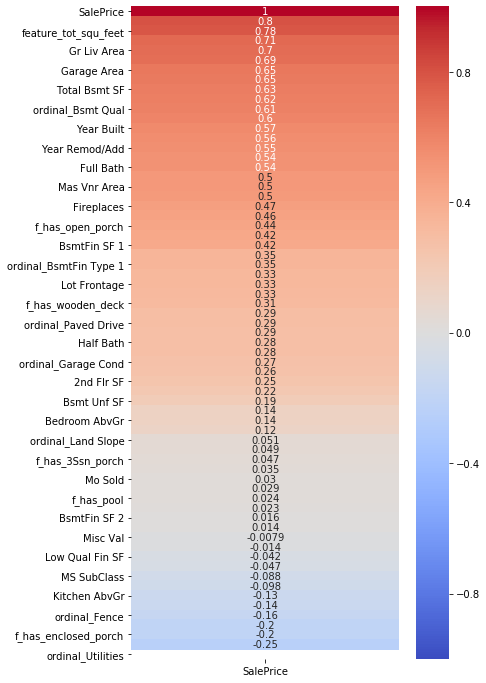

In [6]:
 apps_core = train_cleaned_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)
 plt.figure(figsize=(6,12))  # 6 by 12 inch to make plot bigger
 sns.heatmap(apps_core, vmin=-1,vmax=1,cmap='coolwarm',annot=True)

###  Examine and convert selected nominal columns to numerical values 

In [9]:
cols_nominal =['MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type']

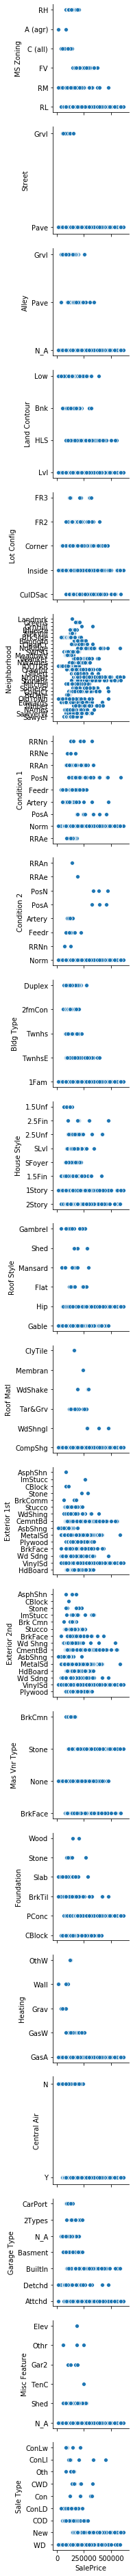

In [10]:
sns.pairplot(train_cleaned_df,x_vars =['SalePrice'],y_vars =cols_nominal)

In [11]:
cols_nominal =['Lot Config','Condition 1','Condition 2','Central Air','Sale Type']
train_cleaned_df =pd.get_dummies(train_cleaned_df,columns = cols_nominal,prefix ='nominal_', drop_first=True)
test_cleaned_df =pd.get_dummies(test_cleaned_df,columns = cols_nominal,prefix ='nominal_', drop_first=True)

###  Sale Price transformation

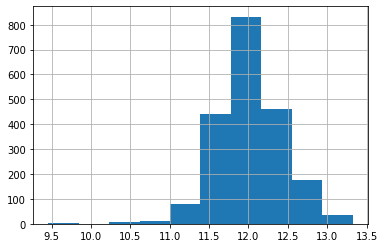

In [12]:
train_cleaned_df['SalePrice'].apply(np.log).hist()

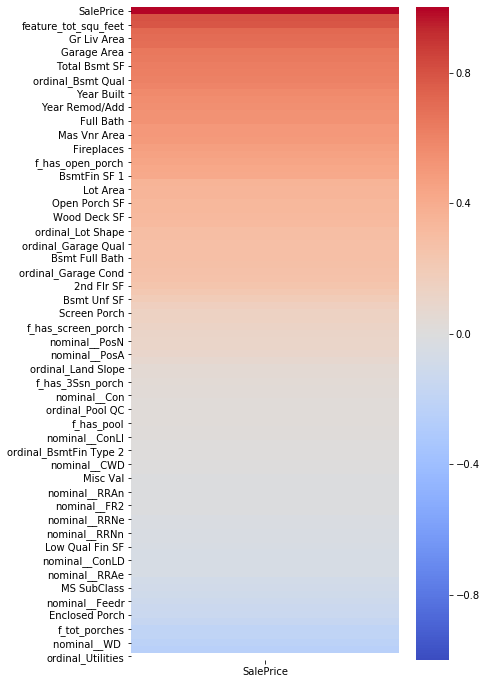

In [13]:
 apps_core = train_cleaned_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)
 plt.figure(figsize=(6,12))  # 6 by 12 inch to make plot bigger
 sns.heatmap(apps_core, vmin=-1,vmax=1,cmap='coolwarm')

### Section 6 Save cleaned data frame  to a file> <a id= 'save_dataframe'></a>

In [14]:
train_cleaned_df['feature_tot_squ_feet'] = train_cleaned_df['Total Bsmt SF']+train_cleaned_df['1st Flr SF']+train_cleaned_df['2nd Flr SF']
test_cleaned_df['feature_tot_squ_feet'] = test_cleaned_df['Total Bsmt SF']+test_cleaned_df['1st Flr SF']+test_cleaned_df['2nd Flr SF']

In [15]:
train_cleaned_df['house_age'] = 2020 -train_cleaned_df['Year Built']
train_cleaned_df['ln_house_age']  = np.log(train_cleaned_df['house_age'])
test_cleaned_df['house_age'] = 2020 -test_cleaned_df['Year Built']
test_cleaned_df['ln_house_age']  = np.log(test_cleaned_df['house_age'])

In [16]:
train_cleaned_df.to_csv("./submission/train_cleaned_ord.csv",index=False)
test_cleaned_df.to_csv("./submission/test_cleaned_ord.csv",index=False)

###### . References
https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

https://www.opendoor.com/w/blog/factors-that-influence-home-value